# Chargement

In [12]:
import pandas as pd 

dataframe = pd.read_csv("dataset.csv", sep=",", index_col=False)
dataframe

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Nettoyage

In [14]:
dataframe["is_male"] = dataframe["sex"].apply( lambda x : 1 if x == "male" else 0)
dataframe["is_smoker"] = dataframe["smoker"].apply( lambda x : 1 if x == "yes" else 0)
dataframe["is_north"] = dataframe["region"].apply( lambda x : 1 if str(x).startswith("north") else 0)
dataframe["is_west"] = dataframe["region"].apply( lambda x : 1 if str(x).endswith("west") else 0)

dataframe2 = dataframe.drop("sex", axis=1)
dataframe2 = dataframe2.drop("smoker", axis=1)
dataframe2 = dataframe2.drop("region", axis=1)

dataframe2

,age,bmi,children,charges,is_male,is_smoker,is_north,is_west
0,19,27.900,0,16884.92400,0,1,0,1
1,18,33.770,1,1725.55230,1,0,0,0
2,28,33.000,3,4449.46200,1,0,0,0
3,33,22.705,0,21984.47061,1,0,1,1
4,32,28.880,0,3866.85520,1,0,1,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,1
1334,18,31.920,0,2205.98080,0,0,1,0
1335,18,36.850,0,1629.83350,0,0,0,0
1336,21,25.800,0,2007.94500,0,0,0,1


In [15]:
dataframe2.describe()

,age,bmi,children,charges,is_male,is_smoker,is_north,is_west
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.485052,0.485800
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.499963,0.499985
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [34]:
import numpy as np
data = np.array(dataframe2, dtype=float)
data

array([[19.  , 27.9 ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [18.  , 33.77,  1.  , ...,  0.  ,  0.  ,  0.  ],
       [28.  , 33.  ,  3.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [18.  , 36.85,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [21.  , 25.8 ,  0.  , ...,  0.  ,  0.  ,  1.  ],
       [61.  , 29.07,  0.  , ...,  1.  ,  1.  ,  1.  ]], shape=(1338, 8))

In [35]:
# age 
(data[:, 0])

array([19., 18., 28., ..., 18., 21., 61.], shape=(1338,))

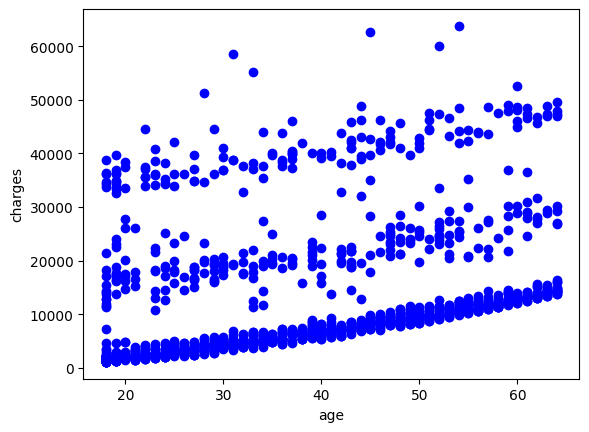

In [36]:
import matplotlib.pyplot as plt

def plot_data(x_label : str, x_values : np.ndarray, 
			  y_label : str, y_values : np.ndarray):
	plt.xlabel(x_label)
	plt.ylabel(y_label)
	plt.plot(x_values, y_values, 'bo')
	plt.show()
	
plot_data("age", data[:, 0], "charges", data[:, 3])

# Analyse